![header](./images/beertaps.png)

# Beer-Recommendation System: Data Prep
Author: Ashli Dougherty 

# Overview

This project's goal is to build a recommendation system for the beer enthusiast. I am interested in creating both a content based and collaborative filtering recommendation system. 
- A content based system will make recommendations based on a beer's features. The content based system will allow any user to enter a beer/characteristic and in return they will be given the names of other beers they will (hopefully) enjoy drinking.  
- The collaborative system will recommend items based on the ratings of other users. This system will compare beer drinker/reviewer profiles and then recommend items based on the similarity between these users. 

***

# Business Understanding 

As of December 2021, there are more than [9,000 breweries](https://vinepair.com/booze-news/us-record-number-breweries-2021/#:~:text=Even%20after%20the%20setbacks%20of,beer%20producers%20in%20the%20U.S.) in the US alone. Even though some taprooms were forced to shut their doors during the pandemic, the craft beer business is still going strong. The [Brewer’s Association](https://www.brewersassociation.org/statistics-and-data/national-beer-stats/) is expecting an increase in craft brewery volume share in the post-pandemic industry market, and reported that craft beer retail sales were over $26 billion dollars in 2021.    
  
Currently, there are mobile apps (like [Untapped](https://untappd.com/)) and websites (like [Beer Advocate](https://www.beeradvocate.com/)) that allow you to personally track and rate the beer you try, but consumers should know they can enjoy their next sip (or pint) with confidence. There are so many options on the market that choosing which beverage to buy next, what brewery to visit in person, or which booth to stand in line for at a festival can seem overwhelming. My goal is to provide a system for beer enthusiasts to try new beers that they are guaranteed to love. Cheers!

***

# Data Understanding 

>There are two datasets being utilized for this project. 

### Tasting Profiles
The [first dataset](https://www.kaggle.com/datasets/stephenpolozoff/top-beer-information?select=beer_data_set.csv) contains data scraped from the website [BeerAdvocate.com](https://www.beeradvocate.com/). It is a CSV file that contains 5,558 beers in total across 112 styles. Other data represented in the table includes: the brewery the beer was produced, a description of the beer, and the overall rating of the beer. As there is no unique user review data, this dataset would be best for a content based recommendation system. 

### Beer Reviews 
The [second dataset](https://www.kaggle.com/datasets/rdoume/beerreviews) is also scraped from [BeerAdvocate.com](https://www.beeradvocate.com/). It is a CSV file that contains approximately 1.6 million reviews of beers from their website. There are a total of 33,388 unique reviewers and 56,857 unique beers that have been reviewed. There are no descriptions of the beers, just names, brewery, style, and ratings on a scale of 1 - 5. Because this data set has both unique users and beer IDs it lends itself to be a collaborative filtering system.   

Due to the large size of these datasets I downloaded them locally and saved to an external repository outside of github.

***

# Data Preparation 

## Imports

Initial cleaning consited of using pandas methods and functions. Visualizations were made using the Seaborn library.  Warnings is imported to ignore the copy/slice warning when slicing a dataframe.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import re
import warnings
warnings.filterwarnings("ignore")

## Load Data

## Tasting Profiles -- content based recs

In [2]:
df_tasting = pd.read_csv('../BeerData/tasting_profiles.csv')

In [3]:
df_tasting.head()

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
4,Scurry,255,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218


In [4]:
# check shape
df_tasting.shape

(5558, 21)

In [5]:
# checking types
df_tasting.info()
# all types look as expected

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5556 non-null   object 
 1   key          5558 non-null   int64  
 2   Style        5558 non-null   object 
 3   Style Key    5558 non-null   int64  
 4   Brewery      5558 non-null   object 
 5   Description  5558 non-null   object 
 6   ABV          5558 non-null   float64
 7   Ave Rating   5558 non-null   float64
 8   Min IBU      5558 non-null   int64  
 9   Max IBU      5558 non-null   int64  
 10  Astringency  5558 non-null   int64  
 11  Body         5558 non-null   int64  
 12  Alcohol      5558 non-null   int64  
 13  Bitter       5558 non-null   int64  
 14  Sweet        5558 non-null   int64  
 15  Sour         5558 non-null   int64  
 16  Salty        5558 non-null   int64  
 17  Fruits       5558 non-null   int64  
 18  Hoppy        5558 non-null   int64  
 19  Spices

In [6]:
df_tasting.isna().sum()

Name           2
key            0
Style          0
Style Key      0
Brewery        0
Description    0
ABV            0
Ave Rating     0
Min IBU        0
Max IBU        0
Astringency    0
Body           0
Alcohol        0
Bitter         0
Sweet          0
Sour           0
Salty          0
Fruits         0
Hoppy          0
Spices         0
Malty          0
dtype: int64

In [7]:
df_tasting.duplicated().sum()

0

> There are no duplicates and only 2 missing values. These missing values will be dropped as I need the identity of the beer in order to recommend it. 

In [8]:
df_tasting.dropna(inplace=True)

In [9]:
df_tasting.shape

(5556, 21)

## Data Cleaning

### Cleaning 'Decription' Feature

In [10]:
df_tasting.Description

0       Notes:Richly malty and long on the palate, wit...
1       Notes:This malty, full-bodied double alt is al...
2       Notes:Long Trail Ale is a full-bodied amber al...
3                                                  Notes:
4       Notes:Just cause it's dark and German doesn't ...
                              ...                        
5553                                               Notes:
5554    Notes:This is the forty-fifth annual Our Speci...
5555                                               Notes:
5556    Notes:Chanukah Beer pours a rich crystal clear...
5557    Notes:The essence of Christmas is captured in ...
Name: Description, Length: 5556, dtype: object

> From a first look at the table it appears that not all the beers actually have a description. Some entries are just 'Notes:' and therefore will not come up as null values even though they do not contain any useable information.

In [11]:
notes = df_tasting.Description == 'Notes:'

In [12]:
notes.sum()

2194

> 2,194 of 5,556 beers have no written description. There will still be over 3,300 unique beers in the data base, therefore, these rows will be dropped. 

In [13]:
# removing Notes: from df, this will leave blank rows that will be dropped
df_tasting.Description = df_tasting.Description.str.strip('Notes:')

In [14]:
#checking dataframe
df_tasting.head()

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Richly malty and long on the palate, with just...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"This malty, full-bodied double alt is also kno...",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Long Trail Ale is a full-bodied amber ale mode...,5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
4,Scurry,255,Altbier,8,Off Color Brewing,Just cause it's dark and German doesn't mean i...,5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218


In [15]:
#dropping empty rows
df_tasting = df_tasting.loc[df_tasting['Description'] != ""]

In [16]:
df_tasting.shape

(3362, 21)

In [17]:
#df_tasting.drop(columns='Description', inplace=True)

### Cleaning 'Style' Feature
#### Binning Styles
There were initially 112 different styles. In order to streamline recommendations and decrease feature complexity I will be combining similar styles together based on the [BeerAdvocate’s Style Guide](https://www.beeradvocate.com/beer/styles/). For example a category on the site is “Brown Ales” with the different variations listed below.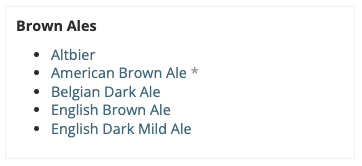
The idea is that if a person likes one type of brown ale (say an Altbier)  they are likely to enjoy another within this category. I created a style dictionary that I will map each 112 subcategories to their 17 main categories. Binning by name of **Style** will simplify this feature when dummy variables are created the [Content Based Recommendation Notebook](./ContentBasedRecs.ipynb), but each unique subcategory will be preserved in the **Style Key** feature. 

In [18]:
df_tasting['Style Key'].nunique()

112

In [19]:
df_tasting['Style'].value_counts()

IPA - New England            50
Stout - American Imperial    49
Wild Ale                     48
IPA - American               46
Farmhouse Ale - Saison       45
                             ..
Farmhouse Ale - Sahti        10
Lager - European Strong      10
Happoshu                     10
Rye Beer - Roggenbier         9
Lambic - Faro                 3
Name: Style, Length: 112, dtype: int64

In [20]:
def unique_list(list1):
    '''
    This function takes a list and creates a new list of unique values. 
    '''
    unique_list = []
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x)
    for x in unique_list: 
        print(x)

In [21]:
# creating a list all styles
style_list = df_tasting['Style'].tolist()

Creating a list of styles to be used in unique_list function. Produced list will be used to create style_map. The cell below remains commented out to prevent the 112 item list from printing. The styles can be seen in the following style_map cell.

In [22]:
# extracting list of styles to use as base for style map
#unique_list(style_list)

In [23]:
style_map = {
    'Altbier': 'Brown Ale',
    'Barleywine - American': 'Strong Ale',
    'Barleywine - English': 'Strong Ale',
    'Bitter - English Extra Special / Strong Bitter (ESB)': 'Pale Ale',
    'Bitter - English': 'Pale Ale',
    'Bière de Champagne / Bière Brut': 'Hybrid Beer',
    'Blonde Ale - American': 'Pale Ale',
    'Blonde Ale - Belgian': 'Pale Ale',
    'Bock - Doppelbock': 'Bock',
    'Bock - Eisbock': 'Bock',
    'Bock - Maibock': 'Bock',
    'Bock - Traditional': 'Bock',
    'Bock - Weizenbock': 'Bock',
    'Braggot': 'Hybrid Beer',
    'Brett Beer': 'Wild/Sour Beer',
    'Brown Ale - American': 'Brown Ale',
    'Brown Ale - Belgian Dark': 'Brown Ale',
    'Brown Ale - English': 'Brown Ale',
    'California Common / Steam Beer': 'Hybrid Beer',
    'Chile Beer': 'Specialty Beer',
    'Cream Ale': 'Hybrid Beer',
    'Dubbel': 'Dark Ale',
    'Farmhouse Ale - Bière de Garde': 'Pale Ale',
    'Farmhouse Ale - Sahti': 'Specialty Beer',
    'Farmhouse Ale - Saison': 'Pale Ale',
    'Fruit and Field Beer': 'Specialty Beer',
    'Gruit / Ancient Herbed Ale': 'Specialty Beer',
    'Happoshu': 'Specialty Beer',
    'Herb and Spice Beer': 'Specialty Beer',
    'IPA - American': 'India Pale Ale',
    'IPA - Belgian': 'India Pale Ale',
    'IPA - Black / Cascadian Dark Ale': 'India Pale Ale',
    'IPA - Brut': 'India Pale Ale',
    'IPA - English': 'India Pale Ale',
    'IPA - Imperial': 'India Pale Ale',
    'IPA - New England': 'India Pale Ale',
    'Kvass': 'Specialty Beer',
    'Kölsch': 'Pale Ale',
    'Lager - Adjunct': 'Pale Lager',
    'Lager - American Amber / Red': 'Dark Lager',
    'Lager - American': 'Pale Lager',
    'Lager - European / Dortmunder Export': 'Pale Lager',
    'Lager - European Dark': 'Dark Lager',
    'Lager - European Pale': 'Pale Lager',
    'Lager - European Strong': 'Pale Lager',
    'Lager - Helles': 'Pale Lager',
    'Lager - India Pale Lager (IPL)': 'Pale Lager',
    'Lager - Japanese Rice': 'Specialty Beer',
    'Lager - Kellerbier / Zwickelbier': 'Pale Lager',
    'Lager - Light': 'Pale Lager',
    'Lager - Malt Liquor': 'Pale Lager',
    'Lager - Munich Dunkel': 'Dark Lager',
    'Lager - Märzen / Oktoberfest': 'Dark Lager',
    'Lager - Rauchbier': 'Dark Lager',
    'Lager - Schwarzbier': 'Dark Lager',
    'Lager - Vienna': 'Dark Lager',
    'Lambic - Faro': 'Wild/Sour Beer',
    'Lambic - Fruit': 'Wild/Sour Beer',
    'Lambic - Gueuze': 'Wild/Sour Beer',
    'Lambic - Traditional': 'Wild/Sour Beer',
    'Low Alcohol Beer': 'Specialty Beer',
    'Mild Ale - English Dark': 'Brown Ale',
    'Mild Ale - English Pale': 'Pale Ale',
    'Old Ale': 'Strong Ale',
    'Pale Ale - American': 'Pale Ale',
    'Pale Ale - Belgian': 'Pale Ale',
    'Pale Ale - English': 'Pale Ale',
    'Pilsner - Bohemian / Czech': 'Pale Lager',
    'Pilsner - German': 'Pale Lager',
    'Pilsner - Imperial': 'Pale Lager',
    'Porter - American': 'Porter',
    'Porter - Baltic': 'Porter',
    'Porter - English': 'Porter',
    'Porter - Imperial': 'Porter',
    'Porter - Robust': 'Porter',
    'Porter - Smoked': 'Porter',
    'Pumpkin Beer': 'Specialty Beer',
    'Quadrupel (Quad)': 'Strong Ale',
    'Red Ale - American Amber / Red': 'Pale Ale',
    'Red Ale - Imperial': 'Strong Ale',
    'Red Ale - Irish': 'Pale Ale',
    'Rye Beer - Roggenbier': 'Dark Ale',
    'Rye Beer': 'Specialty Beer',
    'Scotch Ale / Wee Heavy': 'Strong Ale',
    'Scottish Ale': 'Dark Ale',
    'Smoked Beer': 'Specialty Beer',
    'Sour - Berliner Weisse': 'Wild/Sour Beer',
    'Sour - Flanders Oud Bruin': 'Wild/Sour Beer',
    'Sour - Flanders Red Ale': 'Wild/Sour Beer',
    'Sour - Gose': 'Wild/Sour Beer',
    'Stout - American Imperial': 'Stout',
    'Stout - American': 'Stout',
    'Stout - English': 'Stout',
    'Stout - Foreign / Export': 'Stout',
    'Stout - Irish Dry': 'Stout',
    'Stout - Oatmeal': 'Stout',
    'Stout - Russian Imperial': 'Stout',
    'Stout - Sweet / Milk': 'Stout',
    'Strong Ale - American': 'Strong Ale',
    'Strong Ale - Belgian Dark': 'Strong Ale',
    'Strong Ale - Belgian Pale': 'Strong Ale',
    'Strong Ale - English': 'Strong Ale',
    'Tripel': 'Strong Ale',
    'Wheat Beer - American Dark': 'Wheat Beer',
    'Wheat Beer - American Pale': 'Wheat Beer',
    'Wheat Beer - Dunkelweizen': 'Wheat Beer',
    'Wheat Beer - Hefeweizen': 'Wheat Beer',
    'Wheat Beer - Kristallweizen': 'Wheat Beer',
    'Wheat Beer - Wheatwine': 'Wheat Beer',
    'Wheat Beer - Witbier': 'Wheat Beer',
    'Wild Ale': 'Wild/Sour Beer',
    'Winter Warmer': 'Dark Ale'
}

In [24]:
# applying style map
df_tasting['Style'] = df_tasting['Style'].map(style_map)

In [25]:
# checking to see if any beers were missed in binning process
df_tasting['Style'].isna().sum()

0

In [26]:
# checking to see how many beers are in each new category 
df_tasting['Style'].value_counts()

Pale Ale          403
Strong Ale        356
Pale Lager        341
Wild/Sour Beer    320
Specialty Beer    303
Stout             289
India Pale Ale    282
Porter            213
Dark Lager        203
Wheat Beer        186
Brown Ale         161
Bock              115
Dark Ale           97
Hybrid Beer        93
Name: Style, dtype: int64

In [27]:
# inspecting new style column
df_tasting.head()

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Brown Ale,8,Alaskan Brewing Co.,"Richly malty and long on the palate, with just...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Brown Ale,8,Long Trail Brewing Co.,"This malty, full-bodied double alt is also kno...",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Brown Ale,8,Long Trail Brewing Co.,Long Trail Ale is a full-bodied amber ale mode...,5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
4,Scurry,255,Brown Ale,8,Off Color Brewing,Just cause it's dark and German doesn't mean i...,5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218
5,Sleigh'r Dark Doüble Alt Ale,256,Brown Ale,8,Ninkasi Brewing Company,Called 'Dark Double Alt' on the label.Seize th...,7.2,3.78,25,50,...,51,26,44,45,9,1,11,51,20,95


In [28]:
tasting_styles = df_tasting['Style'].value_counts()

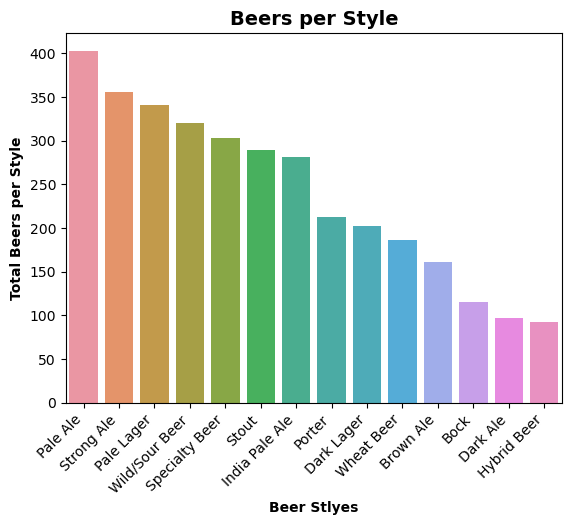

In [29]:
#fig, ax = plt.subplots(figsize =(10, 8)
sns.barplot(x=tasting_styles.index, y=tasting_styles.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Beers per Style', weight='bold')
plt.xlabel('Beer Stlyes', weight='bold')
plt.title('Beers per Style', weight='bold', size=14);

### Continued Column Cleaning

In [30]:
df_tasting.columns

Index(['Name', 'key', 'Style', 'Style Key', 'Brewery', 'Description', 'ABV',
       'Ave Rating', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol',
       'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices',
       'Malty'],
      dtype='object')

#### Cleaning 'key' column

In [31]:
df_tasting.key.nunique()

3362

In [32]:
#Each beer has a 'key' that is acting as an identification number, 
#therefore I am going to rename the column 'beerid'
df_tasting.rename(columns={"key": "beer_id"}, inplace=True)

In [33]:
df_tasting.head(1)

,Name,beer_id,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Brown Ale,8,Alaskan Brewing Co.,"Richly malty and long on the palate, with just...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111


#### Cleaning 'ABV' Column

In [34]:
# checking ABV column values
df_tasting['ABV'].nunique(), df_tasting['ABV'].min(), df_tasting['ABV'].max(), df_tasting['ABV'].mean()

(184, 0.0, 28.0, 6.885038667459857)

<AxesSubplot:xlabel='ABV', ylabel='Count'>

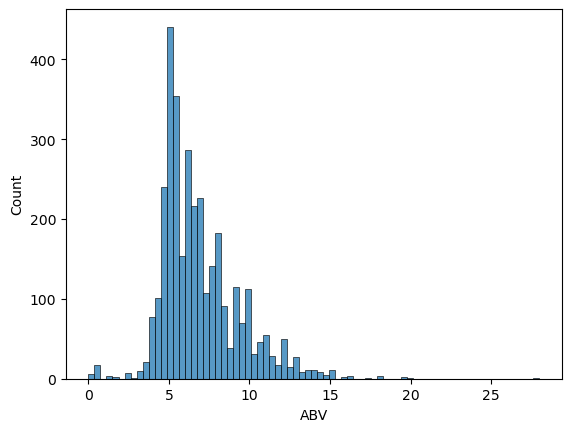

In [35]:
sns.histplot(df_tasting['ABV'])

> On first look it seems that there are some extreme outliers for AVB especially on the higher end. Based on the histogram there seems to be a dropoff after 15% ABV. These beers will be filtered out.

In [36]:
df_tasting = df_tasting.loc[df_tasting['ABV'] <= 15]

In [37]:
# checking to see if high abv beers are dropped
df_tasting.shape
# only lost 16 beers in filtering process

(3346, 21)

<AxesSubplot:xlabel='ABV', ylabel='Count'>

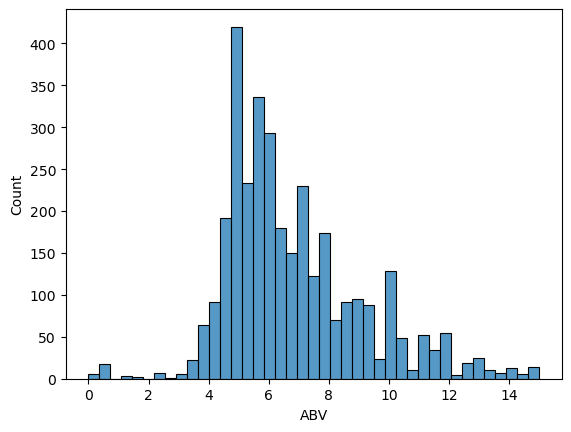

In [38]:
#inspecting new histogram of abv distribution
sns.histplot(df_tasting['ABV'])

In [39]:
#binning abv by group
abv_bins = [-1, 5, 10, 15]
abv_labels = ['Low', 'Medium', 'High']

> Low ABV is between 0 - 5%
>
> Medium ABV is between 6 - 10%
>
> High ABV is between 11 - 15%

In [40]:
df_tasting.ABV = pd.cut(x=df_tasting.ABV, 
                       bins = abv_bins,
                       labels= abv_labels)

In [41]:
df_tasting.ABV.value_counts()

Medium    2231
Low        791
High       324
Name: ABV, dtype: int64

In [42]:
df_tasting.ABV.isna().sum()

0

#### Checking Rating Column

In [43]:
# looks like all reviews are greater than 1 and less than 5
df_tasting['Ave Rating'].describe()

count    3346.000000
mean        3.855326
std         0.404997
min         1.530000
25%         3.670000
50%         3.890000
75%         4.110000
max         4.810000
Name: Ave Rating, dtype: float64

In [44]:
# changing column name to 'Avg Rating' as avg is standard abbreviation for average 
df_tasting.rename(columns={"Ave Rating": "Avg Rating"}, inplace=True)

In [45]:
#checking columns
df_tasting.head(1)

,Name,beer_id,Style,Style Key,Brewery,Description,ABV,Avg Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Brown Ale,8,Alaskan Brewing Co.,"Richly malty and long on the palate, with just...",Medium,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111


### Creating Average IBU Feature
Most general beer styles fall within a range for IBUs (International Bitterness Units). This measures the level of a beer’s bitterness (which comes from hops) on a scale from 0 to 100. The dataset has a min and max for each beer, but an average will be a better indicator of where it would fall within a specific group. After the Average IBU column was created I dropped the min and max columns.

[Source](https://www.firestonebeer.com/what-really-is-ibu/)

In [46]:
# creating average column
df_tasting['AvgIBU'] = ((df_tasting['Max IBU'] + df_tasting['Min IBU']) / 2)

In [47]:
# checking for new column
df_tasting.head()

,Name,beer_id,Style,Style Key,Brewery,Description,ABV,Avg Rating,Min IBU,Max IBU,...,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,AvgIBU
0,Amber,251,Brown Ale,8,Alaskan Brewing Co.,"Richly malty and long on the palate, with just...",Medium,3.65,25,50,...,9,47,74,33,0,33,57,8,111,37.5
1,Double Bag,252,Brown Ale,8,Long Trail Brewing Co.,"This malty, full-bodied double alt is also kno...",Medium,3.90,25,50,...,18,33,55,16,0,24,35,12,84,37.5
2,Long Trail Ale,253,Brown Ale,8,Long Trail Brewing Co.,Long Trail Ale is a full-bodied amber ale mode...,Low,3.58,25,50,...,6,42,43,11,0,10,54,4,62,37.5
4,Scurry,255,Brown Ale,8,Off Color Brewing,Just cause it's dark and German doesn't mean i...,Medium,3.67,25,50,...,10,63,120,14,0,19,36,15,218,37.5
5,Sleigh'r Dark Doüble Alt Ale,256,Brown Ale,8,Ninkasi Brewing Company,Called 'Dark Double Alt' on the label.Seize th...,Medium,3.78,25,50,...,26,44,45,9,1,11,51,20,95,37.5


In [48]:
# dropping min/max columns
df_tasting.drop(columns=['Min IBU', 'Max IBU'], inplace=True)

In [49]:
#checking columns
df_tasting.head(1)

,Name,beer_id,Style,Style Key,Brewery,Description,ABV,Avg Rating,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,AvgIBU
0,Amber,251,Brown Ale,8,Alaskan Brewing Co.,"Richly malty and long on the palate, with just...",Medium,3.65,13,32,9,47,74,33,0,33,57,8,111,37.5


## Duplicate Name Issue
Some beers are from different breweries but have the same name. In this dataset there are 71 examples of this. In order to preserve these entries I think the best approach would be to add the name of the brewry in front of the beer.

By using the pandas .at method I was able to manually add the brewery name. This was an iterative process going through the value counts until no duplicates remained.

In [50]:
df_tasting.Name.duplicated().sum()

144

In [51]:
dupes = pd.DataFrame(df_tasting['Name'].value_counts())
dupes.head()

,Name
Oktoberfest,14
Porter,8
Christmas Ale,7
Smoked Porter,6
Lager,6


### Editing Oktoberfest Beers

In [52]:
df_tasting.at[2604, 'Name'] = 'Great Lakes Oktoberfest'
df_tasting.at[2608, 'Name'] = 'Leinenkugel Oktoberfest'
df_tasting.at[2609, 'Name'] = 'Brooklyn Oktoberfest'
df_tasting.at[2612, 'Name'] = 'Left Hand Oktoberfest'
df_tasting.at[2619, 'Name'] = 'Yuengling Oktoberfest'
df_tasting.at[2627, 'Name'] = 'Summit Oktoberfest'
df_tasting.at[2632, 'Name'] = 'Saint Arnold Oktoberfest'
df_tasting.at[2633, 'Name'] = 'Schlafly Oktoberfest'
df_tasting.at[2635, 'Name'] = 'Revolution Oktoberfest'
df_tasting.at[2637, 'Name'] = 'Blue Point Oktoberfest'
df_tasting.at[2640, 'Name'] = 'Sly Fox Oktoberfest'
df_tasting.at[2643, 'Name'] = 'Capital Oktoberfest'
df_tasting.at[2648, 'Name'] = 'Sprecher Oktoberfest'
df_tasting.at[2778, 'Name'] = 'Hinterland Oktoberfest'

### Editing Porter Beers

In [53]:
df_tasting.at[3467, 'Name'] = 'Sierra Nevada Porter'
df_tasting.at[3505, 'Name'] = 'Duck-Rabbit Porter'
df_tasting.at[3570, 'Name'] = 'Mayflower Porter'
df_tasting.at[3577, 'Name'] = 'Green Man Porter'
df_tasting.at[3663, 'Name'] = 'Founders Porter'
df_tasting.at[3534, 'Name'] = 'Nogne O Porter'
df_tasting.at[3664, 'Name'] = 'Bell\'s Porter'
df_tasting.at[3681, 'Name'] = 'Stoneface Porter'

### Editing Christmas Ales

In [54]:
df_tasting.at[143, 'Name'] = 'Harvey\'s Christmas Ale'
df_tasting.at[183, 'Name'] = 'Gritty McDuff\'s Christmas Ale'
df_tasting.at[3129, 'Name'] = 'Saint Arnold Christmas Ale'
df_tasting.at[183, 'Name'] = 'Gritty McDuff\'s Christmas Ale'
df_tasting.at[5509, 'Name'] = 'Great Lakes Christmas Ale'
df_tasting.at[5516, 'Name'] = 'Breckenridge Christmas Ale'
df_tasting.at[5533, 'Name'] = 'Schlafly Christmas Ale'
df_tasting.at[5537, 'Name'] = 'Sly Fox Christmas Ale'

### Editing Smoked Porters

In [55]:
df_tasting.at[3713, 'Name'] = 'Stone Smoked Porter'
df_tasting.at[3714, 'Name'] = 'Alaskan Smoked Porter'
df_tasting.at[3715, 'Name'] = 'O\'Fallon Porter'
df_tasting.at[3737, 'Name'] = 'Choc Beer Co. Porter'
df_tasting.at[3748, 'Name'] = 'Spring House Smoked Porter'
df_tasting.at[3760, 'Name'] = 'Captain Lawrence Smoked Porter'

### Editing Nut Brown Ale

In [56]:
df_tasting.at[858, 'Name'] = 'AleSmith Nut Brown Ale'
df_tasting.at[871, 'Name'] = 'Ithaca Nut Brown Ale'
df_tasting.at[875, 'Name'] = 'Peak Nut Brown Ale'
df_tasting.at[881, 'Name'] = 'Santa Fe Brewing Company Nut Brown Ale'
df_tasting.at[888, 'Name'] = 'Arcadia Nut Brown Ale'
df_tasting.at[892, 'Name'] = 'Blackstone Nut Brown Ale'

### Editing Winter Ale

In [57]:
df_tasting.at[860, 'Name'] = 'Weyerbacher Winter Ale'
df_tasting.at[3128, 'Name'] = 'Alaskan Winter Ale'
df_tasting.at[4167, 'Name'] = 'Brooklyn Winter Ale'
df_tasting.at[5528, 'Name'] = 'Summit Winter Ale'
df_tasting.at[5546, 'Name'] = 'St. Peter\'s Winter Ale'
df_tasting.at[5551, 'Name'] = 'Fremont Winter Ale'

### Editing Brut IPA

In [58]:
df_tasting.at[1600, 'Name'] = 'Sierra Nevada Brut IPA'
df_tasting.at[1602, 'Name'] = 'Ommegang Brut IPA'
df_tasting.at[1607, 'Name'] = 'Anderson Valley Brut IPA'
df_tasting.at[1609, 'Name'] = 'Ballast Point Brut IPA'
df_tasting.at[1621, 'Name'] = "Devil's Backbone Brut IPA"
df_tasting.at[1629, 'Name'] = '4 Hands Brewing Brut IPA'

### Editing Lager

In [59]:
df_tasting.at[1949, 'Name'] = 'Dixie Beer Lager'
df_tasting.at[1951, 'Name'] = 'Brooklyn Lager'
df_tasting.at[2003, 'Name'] = 'Moosehead Lager'
df_tasting.at[2089, 'Name'] = 'Howe Sound Inn Lager'
df_tasting.at[2658, 'Name'] = 'Brauerei Spezial Lager'
df_tasting.at[2776, 'Name'] = 'Lakewood Lager'

### Editing IPA

In [60]:
df_tasting.at[1456, 'Name'] = 'Lagunitas IPA'
df_tasting.at[1485, 'Name'] = 'Sweetwater IPA'
df_tasting.at[1497, 'Name'] = 'Odell IPA'
df_tasting.at[1651, 'Name'] = 'Harpoon IPA'
df_tasting.at[1664, 'Name'] = 'Arcadia IPA'

### Editing Dunkel

In [61]:
df_tasting.at[2561, 'Name'] = 'Von Trapp Dunkel'
df_tasting.at[2584, 'Name'] = 'The Olde Mecklenburg Dunkel'
df_tasting.at[2590, 'Name'] = 'Prost Dunkel'
df_tasting.at[2594, 'Name'] = 'KC Bier Dunkel'

### Editing Amber Ale

In [62]:
df_tasting.at[3864, 'Name'] = "Bell's Amber Ale"
df_tasting.at[3901, 'Name'] = "Duck-Rabbit Amber Ale"
df_tasting.at[3903, 'Name'] = "Saint Arnold Amber Ale"
df_tasting.at[3985, 'Name'] = "Starr Hill Amber Ale"

### Editing Cream Ale

In [63]:
df_tasting.at[1015, 'Name'] = "Muskoka Cream Ale"
df_tasting.at[1019, 'Name'] = "Hardywood Park Cream Ale"
df_tasting.at[1028, 'Name'] = "Newburgh Cream Ale"
df_tasting.at[1047, 'Name'] = "Empire Brewing Cream Ale"

### Editing Summer Ale

In [64]:
df_tasting.at[321, 'Name'] = "Blue Point Brewing Summer Ale"
df_tasting.at[342, 'Name'] = "Long Trail Summer Ale"
df_tasting.at[3090, 'Name'] = "Granite Summer Ale"
df_tasting.at[3268, 'Name'] = "Brooklyn Summer Ale"

### Editing Hefeweizen

In [65]:
df_tasting.at[5270, 'Name'] = "Flying Dog Hefeweizen"
df_tasting.at[5290, 'Name'] = "Yazoo Hefeweizen"
df_tasting.at[5292, 'Name'] = "Schlafly Hefeweizen"
df_tasting.at[5299, 'Name'] = "Gordon Biersch Hefeweizen"

### Editing Brown Ale

In [66]:
df_tasting.at[759, 'Name'] = "Brooklyn Brown Ale"
df_tasting.at[776, 'Name'] = "Duck-Rabbit Brown Ale"
df_tasting.at[868, 'Name'] = "Legend Brown Ale"
df_tasting.at[879, 'Name'] = "Upslope Brown Ale"

### Editing Imperial Stout

In [67]:
df_tasting.at[4760, 'Name'] = "Founders Imperial Stout"
df_tasting.at[4774, 'Name'] = "Lagunitas Imperial Stout"
df_tasting.at[4789, 'Name'] = "Rogue Ales Imperial Stout"
df_tasting.at[4806, 'Name'] = "Nogne O Imperial Stout"

### Editing Pumpkin Ale

In [68]:
df_tasting.at[3769, 'Name'] = "Schlafly Pumpkin Ale"
df_tasting.at[3771, 'Name'] = "Smuttynose Pumpkin Ale"
df_tasting.at[3803, 'Name'] = "Alewerks Pumpkin Ale"

### Editing Kolsh

In [69]:
df_tasting.at[1856, 'Name'] = "Alaskan Kolsh"
df_tasting.at[1858, 'Name'] = "Schlafly Kolsh"
df_tasting.at[1870, 'Name'] = "Sierra Nevada Kolsh"

### Editing Coffee Porter

In [70]:
df_tasting.at[3507, 'Name'] = "Real Ale Coffee Porter"
df_tasting.at[3572, 'Name'] = "Meantime Brewing Coffee Porter"
df_tasting.at[3706, 'Name'] = "Frost Beer Works Coffee Porter"

### Editing Milk Stout

In [71]:
df_tasting.at[4809, 'Name'] = "Left Hand Milk Stout"
df_tasting.at[4818, 'Name'] = "Duck-Rabbit Milk Stout"
df_tasting.at[4823, 'Name'] = "Lancaster Milk Stout"

### Editing Scottish Ale

In [72]:
df_tasting.at[4164, 'Name'] = "Belhaven Scottish Ale"
df_tasting.at[4187, 'Name'] = "Atlantic Brewing Company Scottish Ale"
df_tasting.at[4192, 'Name'] = "Gritty McDuff's Scottish Ale"

### Editing Schwarzbier

In [73]:
df_tasting.at[2701, 'Name'] = "Kostritzer Schwarzbier"
df_tasting.at[2716, 'Name'] = "Duck-Rabbit Schwarzbier"
df_tasting.at[2722, 'Name'] = "Gordon Biersch Schwarzbier"

### Editing Faro

In [74]:
df_tasting.at[2800, 'Name'] = "Lindemans Faro"
df_tasting.at[2806, 'Name'] = "Timmermans Faro"
df_tasting.at[2809, 'Name'] = "Funk Factory Faro"

### Editing Oatmeal Stout

In [75]:
df_tasting.at[4720, 'Name'] = "Breckenridge Oatmeal Stout"
df_tasting.at[4725, 'Name'] = "Founders Oatmeal Stout"
df_tasting.at[4738, 'Name'] = "Schlafly Oatmeal Stout"

### Editing Abbey Ale

In [76]:
df_tasting.at[829, 'Name'] = "Cathedral Square Abbey Ale"
df_tasting.at[1052, 'Name'] = "Ommegang Abbey Ale"
df_tasting.at[1072, 'Name'] = "Abita Abbey Ale"

### Editing Roggenbier

In [77]:
df_tasting.at[4028, 'Name'] = "Iron Hill Roggenbier"
df_tasting.at[4033, 'Name'] = "DESTIHL Roggenbier"
df_tasting.at[4046, 'Name'] = "Waldmann Roggenbier"

### Editing Pilsner

In [78]:
df_tasting.at[2011, 'Name'] = "Founders Pilsner"
df_tasting.at[3347, 'Name'] = "Schlafly Pilsner"
df_tasting.at[3374, 'Name'] = "Brooklyn Pilsner"

### Editing Gose

In [79]:
df_tasting.at[4410, 'Name'] = "Westbrook Gose"
df_tasting.at[4419, 'Name'] = "Lost Nation Gose"
df_tasting.at[4451, 'Name'] = "Upright Gose"

### Editing Oud Bruin

In [80]:
df_tasting.at[4319, 'Name'] = "Brouwerij Bockor Oud Bruin"
df_tasting.at[4335, 'Name'] = "Brouwerij 't Verzet Oud Bruin"
df_tasting.at[4353, 'Name'] = "Funkwerks Oud Bruin"

### Editing Amber

In [81]:
df_tasting.at[0, 'Name'] = "Alaskan Amber"
df_tasting.at[1954, 'Name'] = "Abita Amber"

### Editing My Antonia

In [82]:
df_tasting.at[3413, 'Name'] = "Dogfish Head My Antonia"
df_tasting.at[3420, 'Name'] = "Birra Del Borgo Head My Antonia"

### Editing Hard Root Beer

In [83]:
df_tasting.at[1415, 'Name'] = "Coney Island Hard Root Beer"
df_tasting.at[1427, 'Name'] = "Sprecher Hard Root Beer"

### Editing India Pale Ale

In [84]:
df_tasting.at[1667, 'Name'] = "Green Man India Pale Ale"
df_tasting.at[1676, 'Name'] = "St. Peter's India Pale Ale"

### Editing London Porter

In [85]:
df_tasting.at[3575, 'Name'] = "Meantime Brewing London Porter"
df_tasting.at[3716, 'Name'] = "Arcadia London Porter"

### Editing Imperial Red Ale

In [86]:
df_tasting.at[3940, 'Name'] = "Epic Imperial Red Ale"
df_tasting.at[3951, 'Name'] = "Marble Imperial Red Ale"

### Editing Vienna Style Lager

In [87]:
df_tasting.at[2754, 'Name'] = "Sierra Nevada Vienna Style Lager"
df_tasting.at[2761, 'Name'] = "Von Trapp Vienna Style Lager"

### Editing Jeremiah Red Ale

In [88]:
df_tasting.at[3982, 'Name'] = "BJ's Restaurant Jeremiah Red Ale"
df_tasting.at[3994, 'Name'] = "BJ's Jeremiah Red Ale"

### Editing Winter Lager

In [89]:
df_tasting.at[2577, 'Name'] = "Sprecher Winter Lager"
df_tasting.at[2749, 'Name'] = "Brooklyn Winter Lager"

### Editing Festbier

In [90]:
df_tasting.at[2605, 'Name'] = "Victory Festbier"
df_tasting.at[2607, 'Name'] = "Bayerische Festbier"

### Editing Octoberfest Beer

In [91]:
df_tasting.at[2613, 'Name'] = "Bell's Octoberfest"
df_tasting.at[2614, 'Name'] = "Harpoon Octoberfest"

### Editing Chocolate Stout

In [92]:
df_tasting.at[4510, 'Name'] = "Rogue Ales Chocolate Stout"
df_tasting.at[4528, 'Name'] = "Harpoon Chocolate Stout"

### Editing Dark Mild

In [93]:
df_tasting.at[3041, 'Name'] = "Machine House Dark Mild"
df_tasting.at[3062, 'Name'] = "Flagship Brewing Dark Mild"

### Editing White

In [94]:
df_tasting.at[5410, 'Name'] = "Allagash White"
df_tasting.at[5441, 'Name'] = "Alaskan White"

### Editing ESB

In [95]:
df_tasting.at[153, 'Name'] = "Redhook ESB"
df_tasting.at[168, 'Name'] = "Green Man ESB"

### Editing Winter Warmer

In [96]:
df_tasting.at[3136, 'Name'] = "Lancaster Winter Warmer"
df_tasting.at[5514, 'Name'] = "Harpoon Winter Warmer"

### Editing Dark Mild

In [97]:
df_tasting.at[2687, 'Name'] = "Iron Hill Rauchbier"
df_tasting.at[2698, 'Name'] = "Fort Hill Rauchbier"

### Editing Märzen

In [98]:
df_tasting.at[2622, 'Name'] = "Gordon Biersch Marzen"
df_tasting.at[2676, 'Name'] = "Brauerei Spezial Marzen"

### Editing Double Stout

In [99]:
df_tasting.at[4485, 'Name'] = "Green Flash Double Stout"
df_tasting.at[4571, 'Name'] = "Hook Norton Double Stout"

### Editing Pale Ale

In [100]:
df_tasting.at[3163, 'Name'] = "Sierra Nevada Pale Ale"
df_tasting.at[3278, 'Name'] = "Schlafly Pale Ale"

### Editing  Stout

In [101]:
df_tasting.at[4512, 'Name'] = "Sierra Nevada Stout"
df_tasting.at[4753, 'Name'] = "Alaskan Stout"

### Editing Kvass

In [102]:
df_tasting.at[1801, 'Name'] = "Jester King Kvass"
df_tasting.at[1809, 'Name'] = "Scratch Brewing Kvass"

### Editing Grodziskie

In [103]:
df_tasting.at[4227, 'Name'] = "Professor Fritz Briem Grodziskie"
df_tasting.at[4237, 'Name'] = "Live Oak Grodziskie"

### Editing Golden Ale

In [104]:
df_tasting.at[1008, 'Name'] = "Terrapin Golden Ale"
df_tasting.at[3080, 'Name'] = "Machine House Golden Ale"

### Editing Maibock

In [105]:
df_tasting.at[508, 'Name'] = "Summit Maibock"
df_tasting.at[514, 'Name'] = "Capital Maibock"

### Editing Best Bitter

In [106]:
df_tasting.at[212, 'Name'] = "Gritty McDuff's Best Bitter"
df_tasting.at[241, 'Name'] = "St. Peter's Best Bitter"

### Editing Wheat Wine

In [107]:
df_tasting.at[5363, 'Name'] = "Smuttynose Wheat Wine"
df_tasting.at[5372, 'Name'] = "Portsmouth Wheat Wine"

### Editing Coffee Stout

In [108]:
df_tasting.at[4521, 'Name'] = "Sierra Nevada Coffee Stout"
df_tasting.at[4730, 'Name'] = "Schlafly Coffee Stout"

### Editing Harvest Ale

In [109]:
df_tasting.at[154, 'Name'] = "Southern Tier Harvest Ale"
df_tasting.at[1472, 'Name'] = "Founders Harvest Ale"

### Editing Cream Stout

In [110]:
df_tasting.at[4577, 'Name'] = "Ozark Cream Stout"
df_tasting.at[4826, 'Name'] = "St. Peter's Brewery Cream Stout"

### Editing Grand Cru

In [111]:
df_tasting.at[4933, 'Name'] = "AleSmith Grand Cru"
df_tasting.at[4941, 'Name'] = "Allagash Cru"

### Editing Saison

In [112]:
df_tasting.at[1223, 'Name'] = "Stone Saison"
df_tasting.at[1225, 'Name'] = "Allagash Saison"

### Editing Irish Red Ale

In [113]:
df_tasting.at[3980, 'Name'] = "Thomas Hooker Irish Red Ale"
df_tasting.at[4010, 'Name'] = "Garrison Irish Red Ale"

### Editing Braggot

In [114]:
df_tasting.at[654, 'Name'] = "Kuhnhenn Braggot"
df_tasting.at[681, 'Name'] = "Crabtree Braggot"

### Editing Helles Golden Lager

In [115]:
df_tasting.at[2270, 'Name'] = "Von Trapp Helles Golden Lager"
df_tasting.at[2271, 'Name'] = "Sly Fox Helles Golden Lager"

### Editing Robust Porter

In [116]:
df_tasting.at[3665, 'Name'] = "Smuttynose Robust Porter"
df_tasting.at[3702, 'Name'] = "Bridge Road Robust Porter"

### Editing Baltic Porter

In [117]:
df_tasting.at[3519, 'Name'] = "Duck-Rabbit Baltic Porter"
df_tasting.at[3535, 'Name'] = "Alaskan Baltic Porter"

### Editing Autumn Ale

In [118]:
df_tasting.at[172, 'Name'] = "Short's Autumn Ale"
df_tasting.at[3131, 'Name'] = "Breckenridge Autumn Ale"

### Editing Blonde Ale

In [119]:
df_tasting.at[344, 'Name'] = "Thomas Hooker Blonde Ale"
df_tasting.at[1890, 'Name'] = "Saint Archer Blonde Ale"

### Editing Bière De Garde

In [120]:
df_tasting.at[1116, 'Name'] = "Schlafly Biere De Garde"
df_tasting.at[1147, 'Name'] = "Choc Beer Co. Biere De Garde"

### Editing Bière De Mars

In [121]:
df_tasting.at[1106, 'Name'] = "Jolly Pumpkin Artisan Ales Biere De Mars"
df_tasting.at[1111, 'Name'] = "Ommegang Biere De Mars"

### Editing Berliner Weisse

In [122]:
df_tasting.at[4274, 'Name'] = "White Birch Berliner Weisse"
df_tasting.at[4302, 'Name'] = "Jackie O's Berliner Weisse"

In [123]:
df_tasting.Name.duplicated().sum()

0

***

## Load Data

## Beer Reviews -- collaborative recs

In [188]:
df_reviews = pd.read_csv('../BeerData/beer_reviews.csv')

In [189]:
df_reviews.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [190]:
# checking shape
df_reviews.shape

(1586614, 13)

In [191]:
# checking data types
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [192]:
# checking null values
df_reviews.isna().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [193]:
# beer_abv has missing values, but only make up 4% of total data, these will be dropped
df_reviews.dropna(inplace=True)

In [194]:
# sanity check
df_reviews.isna().sum()

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

In [195]:
# checking for duplicates
df_reviews.duplicated().sum()

0

In [196]:
df_reviews.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [197]:
# dropping unnecessary column -- review time
df_reviews.drop(columns='review_time', inplace=True)

In [198]:
df_reviews.head(1)

,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986


## Data Cleaning 

### Cleaning 'beer_abv' column
Will drop all extremely high ABV beers just like in 'Tasting' dataset and use same low, medium, and high bins.

In [199]:
# checking min, max and mean ABV
df_reviews.beer_abv.min(), df_reviews.beer_abv.max(), df_reviews.beer_abv.mean()

(0.01, 57.7, 7.042488188823765)

In [200]:
# dropping all beers over 15% ABV
df_reviews = df_reviews.loc[df_reviews['beer_abv'] <= 15]

In [201]:
# sanity check
df_reviews.beer_abv.min(), df_reviews.beer_abv.max(), df_reviews.beer_abv.mean()

(0.01, 15.0, 6.965625129718328)

In [202]:
#binning abv by group
abv_bins = [-1, 5, 10, 15]
abv_labels = ['Low', 'Medium', 'High']

In [203]:
df_reviews['beer_abv'] = pd.cut(x=df_reviews['beer_abv'], 
                       bins = abv_bins,
                       labels= abv_labels)

In [205]:
df_reviews['beer_abv'].value_counts()

Medium    1065816
Low        313111
High       129088
Name: beer_abv, dtype: int64

In [207]:
df_reviews['beer_abv'].isna().sum()

0

### Cleaning 'beer_style' column
Will do the same binning method used with the first dataset as this dataset was also sourced from BeerAdvovate.com. The same beer styles will be applied to simplify the feature. 

In [208]:
df_reviews.beer_style.value_counts()

American IPA                        113144
American Double / Imperial IPA       83265
American Pale Ale (APA)              58072
Russian Imperial Stout               53019
American Double / Imperial Stout     46747
                                     ...  
English Pale Mild Ale                  648
Faro                                   608
Roggenbier                             395
Happoshu                               237
Kvass                                  229
Name: beer_style, Length: 104, dtype: int64

In [209]:
#this dataset has 104 unique styles
df_reviews.beer_style.nunique()

104

In [210]:
style_list2 = df_reviews['beer_style'].tolist()

Creating a list of styles to be used in unique_list function. Produced list will be used to create style_map2. The cell below remains commented out to prevent the 104 item list from printing. The styles can be seen in the following style_map2 cell.

In [211]:
#unique_list(style_list2)

In [212]:
style_map2 = {
    'Hefeweizen': 'Wheat Beer',
    'English Strong Ale': 'Strong Ale',
    'Foreign / Export Stout': 'Stout',
    'German Pilsener': 'Pale Lager',
    'American Double / Imperial IPA': 'India Pale Ale',
    'Herbed / Spiced Beer': 'Specialty Beer',
    'Light Lager': 'Pale Lager',
    'Oatmeal Stout': 'Stout',
    'American Pale Lager': 'Pale Lager',
    'Rauchbier': 'Dark Lager',
    'American Pale Ale (APA)': 'Pale Ale',
    'American Porter': 'Porter',
    'Belgian Strong Dark Ale': 'Strong Ale',
    'American IPA': 'India Pale Ale',
    'Russian Imperial Stout': 'Stout',
    'American Amber / Red Ale': 'Dark Lager',
    'American Strong Ale': 'Strong Ale',
    'Märzen / Oktoberfest': 'Dark Lager',
    'American Adjunct Lager': 'Pale Lager',
    'American Blonde Ale': 'Pale Ale',
    'Euro Pale Lager': 'Pale Lager',
    'English Brown Ale': 'Brown Ale',
    'Fruit / Vegetable Beer': 'Specialty Beer',
    'Belgian Pale Ale': 'Pale Ale',
    'English Bitter': 'Pale Ale',
    'English Porter': 'Porter',
    'Irish Dry Stout': 'Stout',
    'American Barleywine': 'Strong Ale',
    'American Double / Imperial Stout': 'Stout',
    'Doppelbock': 'Bock',
    'American Stout': 'Stout',
    'Maibock / Helles Bock': 'Bock',
    'Dortmunder / Export Lager': 'Pale Lager',
    'Euro Strong Lager': 'Pale Lager',
    'Low Alcohol Beer': 'Specialty Beer',
    'Extra Special / Strong Bitter (ESB)': 'Pale Ale',
    'Bock': 'Bock',
    'English India Pale Ale (IPA)': 'India Pale Ale',
    'Altbier': 'Brown Ale',
    'Kölsch': 'Pale Ale',
    'Pumpkin Ale': 'Specialty Beer',
    'Rye Beer': 'Specialty Beer',
    'American Pale Wheat Ale': 'Wheat Beer',
    'Milk / Sweet Stout': 'Stout',
    'Schwarzbier': 'Dark Lager',
    'Munich Dunkel Lager': 'Dark Lager' ,
    'Vienna Lager': 'Dark Lager',
    'American Amber / Red Lager': 'Dark Lager',
    'Scottish Ale': 'Dark Ale',
    'Witbier': 'Wheat Beer',
    'American Black Ale': 'Specialty Beer',
    'Saison / Farmhouse Ale': 'Pale Ale',
    'English Barleywine': 'Specialty Beer',
    'California Common / Steam Beer': 'Hybrid Beer',
    'Euro Dark Lager': 'Dark Lager',
    'Scotch Ale / Wee Heavy': 'Strong Ale',
    'English Pale Ale': 'Pale Ale',
    'Belgian Strong Pale Ale': 'Strong Ale',
    'Tripel': 'Strong Ale',
    'Flanders Oud Bruin': 'Wild/Sour Beer',
    'American Brown Ale': 'Brown Ale',
    'Smoked Beer': 'Specialty Beer',
    'Dubbel': 'Dark Ale',
    'Dunkelweizen': 'Wheat Beer',
    'Keller Bier / Zwickel Bier': 'Pale Lager',
    'Winter Warmer': 'Dark Ale',
    'Bière de Garde': 'Pale Ale',
    'Belgian Dark Ale': 'Brown Ale',
    'Irish Red Ale': 'Pale Ale',
    'Chile Beer': 'Specialty Beer',
    'English Stout': 'Stout',
    'Czech Pilsener': 'Pale Lager',
    'Belgian IPA': 'India Pale Ale',
    'Cream Ale': 'Hybrid Beer',
    'Black & Tan': 'Hybrid Beer',
    'English Dark Mild Ale': 'Pale Ale',
    'American Wild Ale': 'Wild/Sour Beer',
    'Weizenbock': 'Bock',
    'American Double / Imperial Pilsner': 'Pale Lager',
    'Scottish Gruit / Ancient Herbed Ale': 'Specialty Beer',
    'Wheatwine': 'Strong Ale',
    'American Dark Wheat Ale': 'Wheat Beer',
    'American Malt Liquor': 'Pale Lager',
    'Munich Helles Lager': 'Pale Lager',
    'Kristalweizen': 'Wheat Beer',
    'English Pale Mild Ale': 'Pale Ale',
    'Baltic Porter': 'Porter',
    'Old Ale': 'Strong Ale',
    'Quadrupel (Quad)': 'Strong Ale',
    'Braggot': 'Hybrid Beer',
    'Lambic - Fruit': 'Wild/Sour Beer',
    'Lambic - Unblended': 'Wild/Sour Beer',
    'Eisbock': 'Bock',
    'Flanders Red Ale': 'Wild/Sour Beer',
    'Berliner Weissbier': 'Wild/Sour Beer',
    'Kvass': 'Specialty Beer',
    'Roggenbier': 'Dark Ale',
    'Faro': 'Wild/Sour Beer',
    'Gueuze': 'Wild/Sour Beer',
    'Gose': 'Wild/Sour Beer',
    'Japanese Rice Lager': 'Specialty Beer',
    'Happoshu': 'Specialty Beer',
    'Sahti': 'Specialty Beer',
    'Bière de Champagne / Bière Brut': 'Hybrid Beer'
}

> Initial thoughts is that there are are a lot more wild/sour beers in this data set than the first which can really change what will be recommended to a user. 

In [213]:
# applying style map
df_reviews['beer_style'] = df_reviews['beer_style'].map(style_map2)

In [214]:
#checking to see if any beers were missed
df_reviews['beer_style'].isna().sum()

0

In [215]:
df_reviews['beer_style'].value_counts()

India Pale Ale    223985
Strong Ale        210297
Pale Ale          190232
Stout             172509
Pale Lager        127130
Dark Lager        105155
Specialty Beer    101583
Wheat Beer         87513
Porter             69027
Brown Ale          55622
Bock               53898
Wild/Sour Beer     49963
Dark Ale           48323
Hybrid Beer        12778
Name: beer_style, dtype: int64

In [216]:
#checking for duplicates
df_reviews.duplicated().sum()

747

In [217]:
#dropping duplicates
df_reviews.drop_duplicates(inplace=True)

In [218]:
#checking for duplicates
df_reviews.duplicated().sum()

0

In [219]:
review_styles = df_reviews['beer_style'].value_counts()
review_styles.index

Index(['India Pale Ale', 'Strong Ale', 'Pale Ale', 'Stout', 'Pale Lager',
       'Dark Lager', 'Specialty Beer', 'Wheat Beer', 'Porter', 'Brown Ale',
       'Bock', 'Wild/Sour Beer', 'Dark Ale', 'Hybrid Beer'],
      dtype='object')

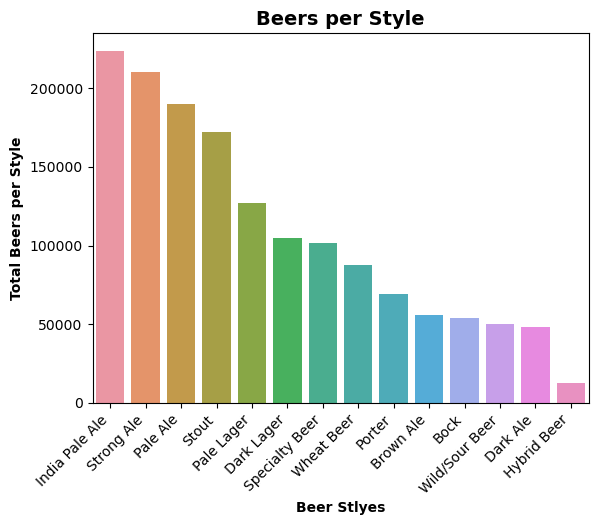

In [220]:
#fig, ax = plt.subplots(figsize =(10, 8)
sns.barplot(x=review_styles.index, y=review_styles.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Beers per Style', weight='bold')
plt.xlabel('Beer Stlyes', weight='bold')
plt.title('Beers per Style', weight='bold', size=14);

### Inspecting Review Counts Per Beer

In [221]:
# simplifying name of column by removing extra 'beer'
df_reviews.rename(columns={"beer_beerid": "beer_id"}, inplace=True)

In [222]:
#dataset has over 48,000 unique beers
df_reviews.beer_id.value_counts()

2093     3281
412      3110
1904     2992
1093     2722
4083     2700
         ... 
39352       1
25735       1
22659       1
61437       1
47986       1
Name: beer_id, Length: 48877, dtype: int64

In [223]:
beer_lessthan5 = df_reviews.groupby('beer_id')['review_overall'].count() < 5

In [224]:
beer_lessthan5.sum()

29744

In [225]:
beer_1review = df_reviews.groupby('beer_id')['review_overall'].count() == 1

In [226]:
beer_1review.sum()

15602

> 60% of the beers have less than 5 reviews and 32% of the beers have only 1 review. Upon seeing this I decided to leave all beers to preserve the data. As this dataset is being utilized for collaborative filtering, limiting based on number of reviews by reviewer might be better approach. The point of the recommender is to also suggest new and different beers to people so I will be keeping them in set for now.

### Cleaning Reviewer Column
Next, I dropped any reviewers that have left only 1 review and then assigned an ID number as a 'user_id' for any remaining reviewers. 

In [227]:
# checking to see how many reviewers remain
df_reviews['review_profilename'].nunique()

32767

In [228]:
# some reviewers have thousands of reviews while others have 1
df_reviews['review_profilename'].value_counts()

northyorksammy    5312
mikesgroove       4257
BuckeyeNation     4240
Thorpe429         3244
brentk56          3165
                  ... 
tbailey32            1
OSURoss              1
JTM65                1
Jagermeisterr        1
Deek88               1
Name: review_profilename, Length: 32767, dtype: int64

In [229]:
greater_than4 = df_reviews.groupby('review_profilename').count() > 4

In [230]:
len(greater_than4)

32767

In [231]:
# filtering to keep only those with at least 5 reviews
df_reviews = df_reviews[df_reviews['review_profilename'].map(df_reviews['review_profilename'].value_counts()) > 4]

In [232]:
# checking 
df_reviews['review_profilename'].value_counts()

northyorksammy     5312
mikesgroove        4257
BuckeyeNation      4240
Thorpe429          3244
brentk56           3165
                   ... 
TheCommonwealth       5
eclipsehts            5
NotBlonde             5
pmcgill10             5
jman42                5
Name: review_profilename, Length: 14550, dtype: int64

In [233]:
df_reviews.shape

(1475492, 12)

In [234]:
df_reviews.head(1)

,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_id
0,10325,Vecchio Birraio,1.5,2.0,2.5,stcules,Wheat Beer,1.5,1.5,Sausa Weizen,Low,47986


In [235]:
# assigning each reviewer their own ID number as alias
df_reviews = df_reviews.assign(user_id=df_reviews.groupby(['review_profilename']).ngroup())

In [236]:
#checking new user_id column
df_reviews.head()

,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_id,user_id
0,10325,Vecchio Birraio,1.5,2.0,2.5,stcules,Wheat Beer,1.5,1.5,Sausa Weizen,Low,47986,13329
1,10325,Vecchio Birraio,3.0,2.5,3.0,stcules,Strong Ale,3.0,3.0,Red Moon,Medium,48213,13329
2,10325,Vecchio Birraio,3.0,2.5,3.0,stcules,Stout,3.0,3.0,Black Horse Black Beer,Medium,48215,13329
3,10325,Vecchio Birraio,3.0,3.0,3.5,stcules,Pale Lager,2.5,3.0,Sausa Pils,Low,47969,13329
4,1075,Caldera Brewing Company,4.0,4.5,4.0,johnmichaelsen,India Pale Ale,4.0,4.5,Cauldron DIPA,Medium,64883,10108


In [237]:
# now that each user has an ID we can drop profile name
df_reviews.drop(columns='review_profilename', inplace=True)

In [238]:
# checking data frame
df_reviews.head(1)

,brewery_id,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_id,user_id
0,10325,Vecchio Birraio,1.5,2.0,2.5,Wheat Beer,1.5,1.5,Sausa Weizen,Low,47986,13329


In [239]:
# since recommendations will be based on overall user rating, extra rating columns will be dropped.
df_reviews.drop(columns = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste'], inplace = True)

In [240]:
#checking df 
df_reviews.head(1)

,brewery_id,brewery_name,review_overall,beer_style,beer_name,beer_abv,beer_id,user_id
0,10325,Vecchio Birraio,1.5,Wheat Beer,Sausa Weizen,Low,47986,13329


In [241]:
#checking for duplicates to drop
df_reviews.duplicated().sum()

5220

In [242]:
df_reviews.drop_duplicates(inplace=True)

In [243]:
df_reviews.shape

(1470272, 8)

***

## Sending Cleaned Data to CSV

For use in other notebooks the cleaned dataframes are saved to separate CSV files. Due to file size these files are saved and accessed locally and were not pushed to github.

#### Cleaned Reviews (collab)

In [244]:
df_reviews.to_csv('../BeerData/reviews_cleaned.csv')

#### Cleaned Tasting (content)

CSV that contains all data.

In [179]:
df_tasting.to_csv('../BeerData/tasting_cleaned.csv')

CSV that contains just description and beer id to be used for text data preprocessing. 

In [180]:
df_tasting.head(1)

,Name,beer_id,Style,Style Key,Brewery,Description,ABV,Avg Rating,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,AvgIBU
0,Alaskan Amber,251,Brown Ale,8,Alaskan Brewing Co.,"Richly malty and long on the palate, with just...",Medium,3.65,13,32,9,47,74,33,0,33,57,8,111,37.5


In [181]:
df_describe = df_tasting.drop(columns=['Name', 'Style', 'Style Key', 'Brewery', 'ABV', 'Avg Rating',
                                       'Astringency', 'Body', 'Alcohol', 'Bitter', 'Sweet', 'Sour',
                                       'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty', 'AvgIBU'])

In [182]:
#checking new df
df_describe.head(1)

,beer_id,Description
0,251,"Richly malty and long on the palate, with just..."


In [183]:
df_describe.to_csv('../BeerData/descriptions.csv')

> These notebooks were used in the [Content Based](./ContentBasedRecs.ipynb) and [Collaborative Filtering](./CollabFiltering) notebooks.